# Sierpiński Gasket

In this notebook we will explore functions in Python to create a [**fractal**](), a self-similar set of numbers.

We will use several built-in functions from Python including:

* ``math.sqrt``: returns the square root of a real valued number.
    * What is the domain?
    * What is the range?
* ``random.choice()``: a function to randomly choose an element from a collection
* ``random.uniform()``: a function to return a random number from within a specified domain.

We will also use the matplotlib package for drawing points. Specifically, we will use the ``scatter`` function from the pyplot module in matplotlib

## Some Python preliminaries

We are going to set the notebook to draw our graphs directly in the web page (instead of trying to launch a separte window).

We are also going to **import** (checkout from the library) the random, math

In [1]:
#%matplotlib inline
import random
import matplotlib.pyplot as pp
import math

### Named Tuples

In [2]:
from collections import namedtuple
Point = namedtuple('Point', ['x', 'y'])

## Chaos Game

We are going to create our set using functions that implement the *Chaos Game*.

In [3]:
def f1(p):
    """
    Arguments:
    p: Point named tuple
    
    Result:
    takes  p and returns a new point p'
    according to the rule p'= (p.x/2,p.y/2)
    """
    return Point(p.x/2,p.y/2)
def f2(p):
    """
    Arguments:
    p: Point named tuple
    
    Result:
    takes p and returns a new point p'
    according to the rule p' = (p.x/2+1/2,p.y/2)
    """
    return Point(p.x/2+0.5,p.y/2)

def f3(p):
    """
    Arguments:
    p: Point named tuple
    
    Result:
    takes p and returns a new point p'
    according to the rule p' = (p.x/2+1/4,p.y/2+sqrt(3)/4)
    """
    return Point(p.x/2+0.25,p.y/2+math.sqrt(3)/4)

### Now lets make a [tuple](../SetsAndSequences/Tuples.ipynb) of our functions


In [4]:
functions = (f1,f2,f3)

### Helper Functions

We are also going to define some functions that will help us run the game. These include:

* A function that takes a point (p) and returns a new point (p') from a randomly selected function implementing one of our rules
* A function that will generate a starting point
* A function that returns a sequence of N points generated by our Chaos Game rules
* A function that plots our points

### Remember what a function is

* What is our input?
* What is our output?

In [5]:
def new_point(p,functions):
    """
    Arguments:
    
    p: a 2D point stored as a named tuple Point
    functions: a tuple of functions that return
    a new point 
    """
    return random.choice(functions)(p)

In [6]:
new_point(Point(3,4),functions)

Point(x=1.75, y=2.433012701892219)

In [7]:
def get_first_point(xdomain, ydomain):
    return Point(random.uniform(xdomain[0],xdomain[1]),
                 random.uniform(ydomain[0],ydomain[1]))

In [8]:
def get_points(num_points):
    points = [get_first_point([0,1],[0,1])]
    for i in range(num_points):
        points.append(new_point(points[-1],functions))
    return points

In [9]:
def draw_points(points):
    xs = [p.x for p in points]
    ys = [p.y for p in points]
    pp.scatter(xs,ys,s=1,marker ='.', color='k')
    

In [10]:
def run_game(num_points):
    draw_points(get_points(num_points))

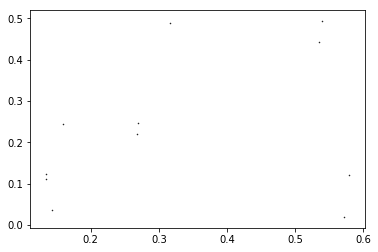

In [11]:
run_game(10)

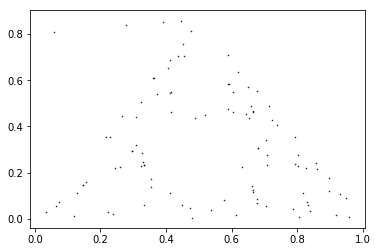

In [12]:
run_game(100)

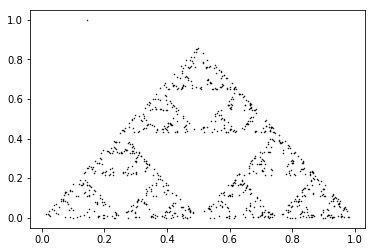

In [13]:
run_game(1000)

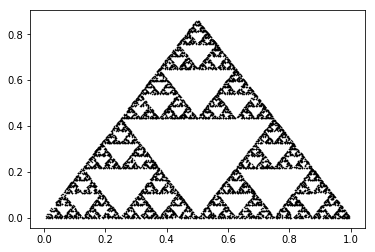

In [14]:
run_game(10000)

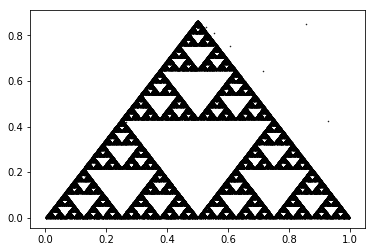

In [15]:
run_game(100000)